In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(f'../output/(37t)สถานีอุตุนิยมวิทยาลำปาง.csv')

# Display the first few rows of the DataFrame
df.head()

,datetime,date,hour,PM10,CO,NO,NO2,NOX,SO2,O3,Wind speed,Wind dir,Temp,Rel hum,Pressure,Glob rad,Net rad,Rain,PM2.5
0,2013-01-01 01:00:00,2013-01-01,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,53.0,19.9,88.0,738.0,0.0,-48.0,0.0,NaN
1,2013-01-01 02:00:00,2013-01-01,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,37.0,19.6,89.0,738.0,0.0,-39.0,0.0,NaN
2,2013-01-01 03:00:00,2013-01-01,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,53.0,19.4,90.0,738.0,0.0,-36.0,0.0,NaN
3,2013-01-01 04:00:00,2013-01-01,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,52.0,19.8,87.0,738.0,0.0,-22.0,0.0,NaN
4,2013-01-01 05:00:00,2013-01-01,05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,32.0,19.8,87.0,738.0,0.0,-29.0,0.0,NaN


C:\Users\User\AppData\Local\Temp\ipykernel_19632\244183385.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_datetime(data['datetime'])
C:\Users\User\AppData\Local\Temp\ipykernel_19632\244183385.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SO2'].interpolate(method='linear', inplace=True)


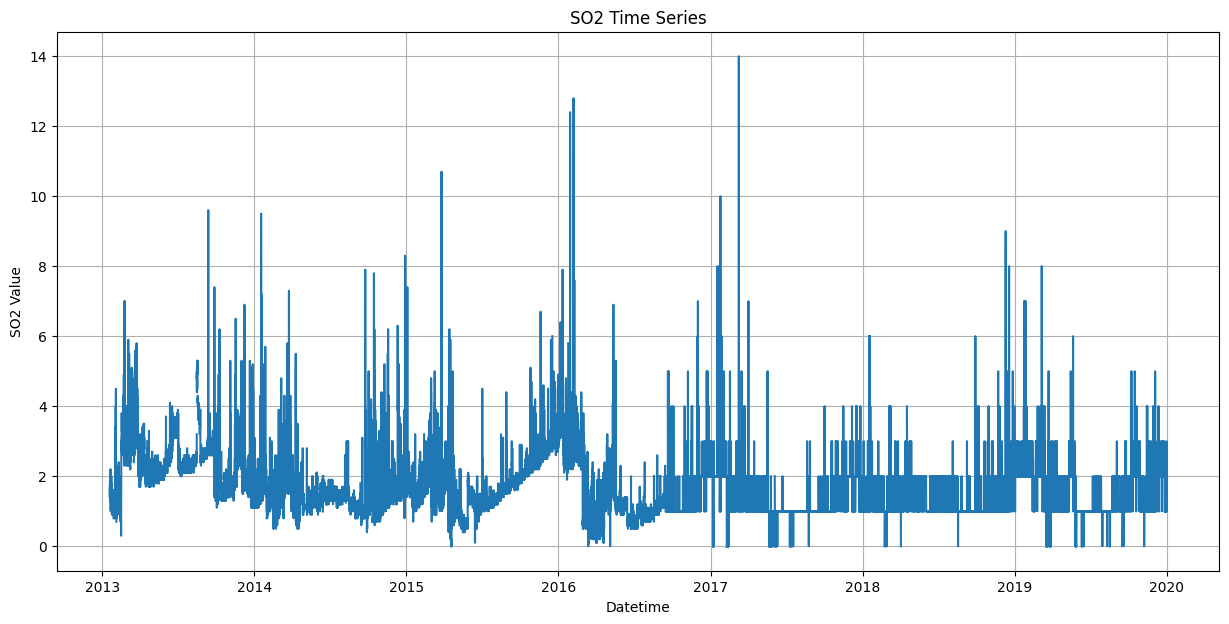

In [ ]:
import matplotlib.pyplot as plt

# Extract datetime and SO2 columns
data = df[['datetime', ' SO2 ']]

# Rename columns for convenience
data.columns = ['datetime', 'SO2']

# Convert 'datetime' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Handling missing values: Fill NaN values using interpolation
data['SO2'].interpolate(method='linear', inplace=True)

# Plotting the time series
plt.figure(figsize=(15, 7))
plt.plot(data['datetime'], data['SO2'])
plt.title('SO2 Time Series')
plt.xlabel('Datetime')
plt.ylabel('SO2 Value')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Normalize the SO2 data
scaler = MinMaxScaler(feature_range=(0, 1))
data['SO2_normalized'] = scaler.fit_transform(data[['SO2']])

def create_sequences(data, seq_length):
    """
    Create sequences from the data.
    """
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Sequence length
SEQ_LENGTH = 720

X, y = create_sequences(data['SO2_normalized'].values, SEQ_LENGTH)

# Splitting the dataset into training and test sets (last 1440 hours for testing)
X_train = X[:-1440]
y_train = y[:-1440]
X_test = X[-1440:]
y_test = y[-1440:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape


C:\Users\User\AppData\Local\Temp\ipykernel_19632\1761308515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SO2_normalized'] = scaler.fit_transform(data[['SO2']])


((59184, 720), (59184,), (1440, 720), (1440,))

In [ ]:
import numpy as np

# Recreating sequences after importing numpy
X, y = create_sequences(data['SO2_normalized'].values, SEQ_LENGTH)

# Splitting the dataset into training and test sets (last 1440 hours for testing)
X_train = X[:-1440]
y_train = y[:-1440]
X_test = X[-1440:]
y_test = y[-1440:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((59184, 720), (59184,), (1440, 720), (1440,))

 1/29 [>.............................] - ETA: 1:42 - loss: nanExecuting op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_27553 in device /job:localhost/replica:0/task:0/device:GPU:0
 2/29 [=>............................] - ETA: 48s - loss: nan Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_27553 in device /job:localhost/replica:0/task:0/device:GPU:0
 3/29 [==>...........................] - ETA: 47s - loss: nanExecuting op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_27553 in device /job:localhost/replica:0/task:0/device:GPU:0
 4/29 [===>.....................

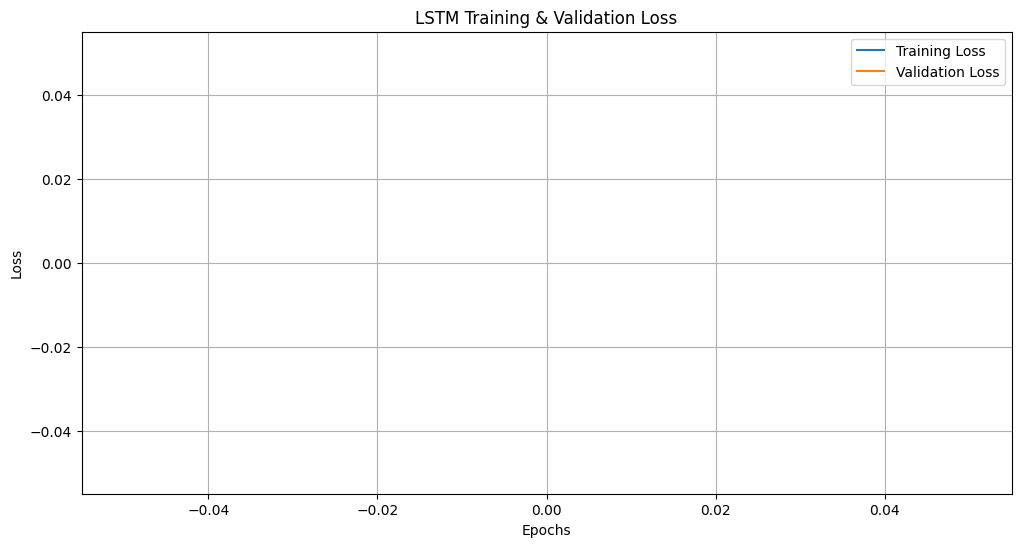

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# tf.debugging.set_log_device_placement(True)
tf.get_logger().setLevel('ERROR')


# Define the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(SEQ_LENGTH, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, validation_data=(X_test_reshaped, y_test), batch_size=2048)

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
